In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
!pip install lime
import lime
from lime import lime_tabular
import statistics as sts
from scipy import stats
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTEN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
import time
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import missingno as msno
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e066cd189b1707649dde04d5c4f61ba626f71c055594493314fb7664ed8e39bc
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Research/hepatitis.csv',index_col='age')

In [ ]:
df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
age,,,,,,,,,,,,,,,,,,,
30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live


In [ ]:
df_1 = df.sort_index(ascending=True)
df_1

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
age,,,,,,,,,,,,,,,,,,,
7,female,True,False,False,False,False,True,True,True,False,False,False,0.7,256.0,25.0,4.2,NaN,True,live
20,male,False,False,True,True,True,False,True,True,True,False,False,2.3,150.0,68.0,3.9,NaN,False,live
20,female,False,False,False,False,False,True,NaN,False,False,False,False,0.9,89.0,152.0,4.0,NaN,True,live
20,female,False,False,True,True,True,True,False,False,True,True,False,1.0,160.0,118.0,2.9,23.0,True,live
22,female,True,False,False,False,False,True,False,False,False,False,False,0.7,NaN,24.0,NaN,NaN,True,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,male,False,False,True,True,False,True,False,NaN,NaN,NaN,NaN,1.5,179.0,69.0,2.9,NaN,False,live
69,male,True,False,True,False,False,True,False,False,False,False,False,3.2,119.0,136.0,NaN,NaN,True,live
70,female,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,True,die


In [ ]:
df_1.reset_index(inplace=True)
df_1

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,7,female,True,False,False,False,False,True,True,True,False,False,False,0.7,256.0,25.0,4.2,NaN,True,live
1,20,male,False,False,True,True,True,False,True,True,True,False,False,2.3,150.0,68.0,3.9,NaN,False,live
2,20,female,False,False,False,False,False,True,NaN,False,False,False,False,0.9,89.0,152.0,4.0,NaN,True,live
3,20,female,False,False,True,True,True,True,False,False,True,True,False,1.0,160.0,118.0,2.9,23.0,True,live
4,22,female,True,False,False,False,False,True,False,False,False,False,False,0.7,NaN,24.0,NaN,NaN,True,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,67,male,False,False,True,True,False,True,False,NaN,NaN,NaN,NaN,1.5,179.0,69.0,2.9,NaN,False,live
151,69,male,True,False,True,False,False,True,False,False,False,False,False,3.2,119.0,136.0,NaN,NaN,True,live
152,70,female,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,True,die
153,72,female,True,True,True,False,False,True,True,False,False,False,False,1.0,115.0,52.0,3.4,50.0,True,live


In [ ]:
non_null_prcntge = (pd.notnull(df_1).sum()/155)*100
non_null_prcntge

age                100.000000
sex                100.000000
steroid             99.354839
antivirals         100.000000
fatigue             99.354839
malaise             99.354839
anorexia            99.354839
liver_big           93.548387
liver_firm          92.903226
spleen_palpable     96.774194
spiders             96.774194
ascites             96.774194
varices             96.774194
bilirubin           96.129032
alk_phosphate       81.290323
sgot                97.419355
albumin             89.677419
protime             56.774194
histology          100.000000
class              100.000000
dtype: float64

In [ ]:
# converting to numerical
df_1.sex[df_1.sex == "female"] = 0
df_1.sex[df_1.sex == "male"] = 1
df_1['class'][df_1['class'] == "die"] = 0
df_1['class'][df_1['class'] == "live"] = 1

for i in df_1:
  df_1[i][df_1[i] == False] = 0
  df_1[i][df_1[i] == True] = 1

<ipython-input-9-fa4a16fd91df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.sex[df_1.sex == "female"] = 0
<ipython-input-9-fa4a16fd91df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.sex[df_1.sex == "male"] = 1
<ipython-input-9-fa4a16fd91df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['class'][df_1['class'] == "die"] = 0
<ipython-input-9-fa4a16fd91df>:5: SettingWithCopyWarning: 
A value is trying to be set on

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['age'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['bilirubin'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['alk_phosphate'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['sgot'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['albumin'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['protime'])

In [ ]:
# def box_outliers(series):
#     Q1 = series.quantile(0.25)
#     Q3 = series.quantile(0.75)
#     IQR = Q3 - Q1
#     mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
#     series = series[mask]
#     return series

In [ ]:
# print('number of lives(age): ', sum(df_1.iloc[box_outliers(df_1['age'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(age): ', sum(df_1.iloc[box_outliers(df_1['age'].sort_values(ascending=True)).index.values]['class']==0),'\n')

# print('number of lives(albumin): ', sum(df_1.iloc[box_outliers(df_1['albumin'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(albumin): ', sum(df_1.iloc[box_outliers(df_1['albumin'].sort_values(ascending=True)).index.values]['class']==0), '\n')

# print('number of lives(sgot): ', sum(df_1.iloc[box_outliers(df_1['sgot'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(sgot): ', sum(df_1.iloc[box_outliers(df_1['sgot'].sort_values(ascending=True)).index.values]['class']==0), '\n')

# print('number of lives(alk_phosphate): ', sum(df_1.iloc[box_outliers(df_1['alk_phosphate'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(alk_phosphate): ', sum(df_1.iloc[box_outliers(df_1['alk_phosphate'].sort_values(ascending=True)).index.values]['class']==0), '\n')

# print('number of lives(protime): ', sum(df_1.iloc[box_outliers(df_1['protime'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(protime): ', sum(df_1.iloc[box_outliers(df_1['protime'].sort_values(ascending=True)).index.values]['class']==0), '\n')

# print('number of lives(bilirubin): ', sum(df_1.iloc[box_outliers(df_1['bilirubin'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(bilirubin): ', sum(df_1.iloc[box_outliers(df_1['bilirubin'].sort_values(ascending=True)).index.values]['class']==0))

In [ ]:
# numerical_columns = ['age', 'albumin', 'sgot', 'alk_phosphate', 'bilirubin', 'protime']

# for i in numerical_columns:
#   print('number of lives for ', i, ':' , sum(df_1.iloc[box_outliers(df_1[i].sort_values(ascending=True)).index.values]['class']==1))
#   print('number of dies for ', i, ': ', sum(df_1.iloc[box_outliers(df_1[i].sort_values(ascending=True)).index.values]['class']==0),'\n')

In [ ]:
# # outlier detection for age column
# upper_limit = df_1.age.mean() + 3*df_1.age.std()
# lower_limit = df_1.age.mean() -3*df_1.age.std()
# df_1[(df_1.age>upper_limit) | (df_1.age<lower_limit)].shape

In [ ]:
# # outlier detection for bilirubin column
# upper_limit = df_1.bilirubin.mean() + 3*df_1.bilirubin.std()
# lower_limit = df_1.bilirubin.mean() -3*df_1.bilirubin.std()
# df_1[(df_1.bilirubin>upper_limit) | (df_1.bilirubin<lower_limit)]

In [ ]:
# # outlier detection for alk_phosphate column
# upper_limit = df_1.alk_phosphate.mean() + 3*df_1.alk_phosphate.std()
# lower_limit = df_1.alk_phosphate.mean() -3*df_1.alk_phosphate.std()
# df_1[(df_1.alk_phosphate>upper_limit) | (df_1.alk_phosphate<lower_limit)]

In [ ]:
# # outlier detection for sgot column
# upper_limit = df_1.sgot.mean() + 3*df_1.sgot.std()
# lower_limit = df_1.sgot.mean() -3*df_1.sgot.std()
# df_1[(df_1.sgot>upper_limit) | (df_1.sgot<lower_limit)]

In [ ]:
# # outlier detection for albumin column
# upper_limit = df_1.albumin.mean() + 3*df_1.albumin.std()
# lower_limit = df_1.albumin.mean() -3*df_1.albumin.std()
# df_1[(df_1.albumin>upper_limit) | (df_1.albumin<lower_limit)]

In [ ]:
# # outlier detection for protime column
# upper_limit = df_1.protime.mean() + 3*df_1.protime.std()
# lower_limit = df_1.protime.mean() -3*df_1.protime.std()
# df_1[(df_1.protime>upper_limit) | (df_1.protime<lower_limit)].shape

In [ ]:
# # outlier removal for the dataset
# df_2 = df_1.drop([14,20,99,152,56,77,34,102], axis=0)
# df_2.shape

####Chunking the dataset based on age column and imputing missing values

In [ ]:
chunk1 = df_1.iloc[:52]
chunk2 = df_1.iloc[52:104]
chunk3 = df_1.iloc[104:]

In [ ]:
chunk1.shape

(52, 20)

## For chunk1

In [ ]:
X_cat = chunk1.drop(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], axis=1)

In [ ]:
X_cat.head()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,0,1,0,0,0,0,1,1,1,0,0,0,1,1
1,1,0,0,1,1,1,0,1,1,1,0,0,0,1
2,0,0,0,0,0,0,1,NaN,0,0,0,0,1,1
3,0,0,0,1,1,1,1,0,0,1,1,0,1,1
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1


In [ ]:
X_cat.describe()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,52,51,52,51,51,51,48,47,50,50,50,50,52,52
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,1,0,1,0,0,1,0,0,0,0,0,0,1
freq,44,31,45,27,33,40,41,31,44,38,45,47,36,48


In [ ]:
#imputation for categorical features with mode value
X_cat.sex.fillna(0, inplace=True)
X_cat.steroid.fillna(1, inplace=True)
X_cat.antivirals.fillna(0, inplace=True)
X_cat.fatigue.fillna(1, inplace=True)
X_cat.malaise.fillna(0, inplace=True)
X_cat.anorexia.fillna(0, inplace=True)
X_cat.liver_big.fillna(1, inplace=True)
X_cat.liver_firm.fillna(0, inplace=True)
X_cat.spleen_palpable.fillna(0, inplace=True)
X_cat.spiders.fillna(0, inplace=True)
X_cat.ascites.fillna(0, inplace=True)
X_cat.varices.fillna(0, inplace=True)
X_cat.histology.fillna(0, inplace=True)
X_cat['class'].fillna(1, inplace=True)

In [ ]:
X_num = chunk1[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]

In [ ]:
#imputation for numerical features with mean value
for i in X_num:
  X_num[i].fillna(X_num[i].mean(), inplace=True)

<ipython-input-33-45107100bc7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[i].fillna(X_num[i].mean(), inplace=True)


In [ ]:
chunk1_updated = pd.concat([X_cat, X_num], axis=1)
chunk1_updated

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,0,1,0,0,0,0,1,1,1,0,0,0,1,1,7,0.700,256.000000,25.00,4.200000,66.448276
1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,20,2.300,150.000000,68.00,3.900000,66.448276
2,0,0,0,0,0,0,1,0,0,0,0,0,1,1,20,0.900,89.000000,152.00,4.000000,66.448276
3,0,0,0,1,1,1,1,0,0,1,1,0,1,1,20,1.000,160.000000,118.00,2.900000,23.000000
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1,22,0.700,102.102564,24.00,4.019149,66.448276
5,1,1,1,1,0,0,1,0,0,0,0,0,0,1,22,0.900,48.000000,20.00,4.200000,64.000000
6,0,1,0,0,0,0,1,0,0,0,0,0,0,1,23,1.000,102.102564,84.68,4.019149,66.448276
7,0,1,0,1,1,1,1,0,0,0,0,0,0,1,23,0.800,102.102564,14.00,4.800000,66.448276
8,0,1,0,1,1,1,1,0,1,0,0,0,0,1,23,1.300,194.000000,150.00,4.100000,90.000000
9,0,1,0,0,0,0,1,0,0,0,0,0,0,1,23,4.600,56.000000,16.00,4.600000,66.448276


## For chunk2

In [ ]:
X_cat = chunk2.drop(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], axis=1)
X_cat.describe()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,52,52,52,52,52,52,51,51,52,52,52,52,52,52
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,1,0,0,1,0,0,0,0,0,0,1
freq,50,28,42,33,32,39,44,30,41,36,45,44,28,39


In [ ]:
#imputation for categorical features with mode value
X_cat.sex.fillna(0, inplace=True)
X_cat.steroid.fillna(0, inplace=True)
X_cat.antivirals.fillna(0, inplace=True)
X_cat.fatigue.fillna(1, inplace=True)
X_cat.malaise.fillna(0, inplace=True)
X_cat.anorexia.fillna(0, inplace=True)
X_cat.liver_big.fillna(1, inplace=True)
X_cat.liver_firm.fillna(0, inplace=True)
X_cat.spleen_palpable.fillna(0, inplace=True)
X_cat.spiders.fillna(0, inplace=True)
X_cat.ascites.fillna(0, inplace=True)
X_cat.varices.fillna(0, inplace=True)
X_cat.histology.fillna(0, inplace=True)
X_cat['class'].fillna(1, inplace=True)

In [ ]:
X_num = chunk2[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]
#imputation for numerical features with mean value
for i in X_num:
  X_num[i].fillna(X_num[i].mean(), inplace=True)

<ipython-input-37-49d78d1d6bef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[i].fillna(X_num[i].mean(), inplace=True)


In [ ]:
chunk2_updated = pd.concat([X_cat, X_num], axis=1)
chunk2_updated

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
52,0,0,0,1,0,0,1,0,1,1,1,0,1,0,35,1.5,138.000000,58.0,2.600000,66.2
53,0,1,0,1,0,0,1,0,0,0,0,0,0,1,35,0.9,58.000000,92.0,4.300000,73.0
54,0,0,0,1,1,1,1,1,0,0,0,0,0,1,36,1.0,101.177778,45.0,4.000000,57.0
55,0,1,0,0,0,0,1,0,0,0,0,0,1,1,36,0.6,120.000000,30.0,4.000000,66.2
56,0,0,0,1,1,1,0,1,0,1,0,1,1,1,36,1.7,295.000000,60.0,2.700000,66.2
57,0,1,0,0,0,0,1,0,0,0,0,0,0,1,36,0.7,62.000000,224.0,4.200000,100.0
58,0,0,0,0,0,0,1,0,1,0,0,0,0,1,36,0.8,85.000000,44.0,4.200000,85.0
59,0,0,0,0,0,0,0,1,1,0,0,0,0,1,36,0.7,164.000000,44.0,3.100000,41.0
60,0,0,0,0,0,0,1,0,0,0,0,0,1,1,36,1.1,141.000000,75.0,3.300000,66.2
61,0,1,0,1,0,0,1,0,0,1,0,0,0,0,37,0.6,67.000000,28.0,4.200000,66.2


## For chunk3

In [ ]:
X_cat = chunk3.drop(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], axis=1)
X_cat.describe()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,51,51,51,51,51,51,46,46,48,48,48,48,51,51
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,1,0,0,1,1,0,0,0,0,1,1
freq,45,28,44,40,28,43,35,23,35,25,40,41,30,36


In [ ]:
#imputation for categorical features with mode value
X_cat.sex.fillna(0, inplace=True)
X_cat.steroid.fillna(0, inplace=True)
X_cat.antivirals.fillna(0, inplace=True)
X_cat.fatigue.fillna(1, inplace=True)
X_cat.malaise.fillna(0, inplace=True)
X_cat.anorexia.fillna(0, inplace=True)
X_cat.liver_big.fillna(1, inplace=True)
X_cat.liver_firm.fillna(1, inplace=True)
X_cat.spleen_palpable.fillna(0, inplace=True)
X_cat.spiders.fillna(0, inplace=True)
X_cat.ascites.fillna(0, inplace=True)
X_cat.varices.fillna(0, inplace=True)
X_cat.histology.fillna(1, inplace=True)
X_cat['class'].fillna(1, inplace=True)

In [ ]:
X_num = chunk3[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]
#imputation for numerical features with mean value
for i in X_num:
  X_num[i].fillna(X_num[i].mean(), inplace=True)

<ipython-input-41-2ec9a93d3f82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[i].fillna(X_num[i].mean(), inplace=True)


In [ ]:
chunk3_updated = pd.concat([X_cat, X_num], axis=1)
chunk3_updated

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
104,0,1,0,1,1,0,1,1,0,0,1,1,1,0,47,1.700000,86.000000,20.000000,2.100000,46.000000
105,0,0,1,0,0,0,1,0,0,0,0,0,0,1,47,1.651064,112.761905,60.000000,3.626667,52.758621
106,0,1,0,0,0,0,1,0,0,1,0,1,1,0,47,2.000000,84.000000,23.000000,4.200000,66.000000
107,0,0,0,1,1,0,1,1,0,1,1,1,1,0,48,4.800000,123.000000,157.000000,2.700000,31.000000
108,0,1,0,1,1,1,1,1,0,1,0,0,1,1,48,2.000000,158.000000,278.000000,3.800000,52.758621
109,0,0,0,1,1,0,1,0,1,1,0,0,1,0,49,1.400000,85.000000,70.000000,3.500000,35.000000
110,0,0,1,1,1,1,1,1,0,1,0,0,0,1,49,0.600000,85.000000,48.000000,3.700000,52.758621
111,0,1,0,1,1,0,1,0,0,0,0,0,0,1,49,0.800000,103.000000,43.000000,3.500000,66.000000
112,0,1,0,0,0,0,1,1,1,1,0,0,1,1,50,1.000000,85.000000,75.000000,4.000000,72.000000
113,0,0,0,1,0,0,0,0,0,0,0,0,0,1,50,0.900000,135.000000,42.000000,3.500000,52.758621


In [ ]:
final_df = pd.concat([chunk1_updated, chunk2_updated, chunk3_updated], axis=0)
final_df.shape

(155, 20)

In [ ]:
final_df['class'] = final_df['class'].astype(float) # With integer, models don't work.
final_df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,0,1,0,0,0,0,1,1,1,0,0,0,1,1.0,7,0.7,256.000000,25.0,4.200000,66.448276
1,1,0,0,1,1,1,0,1,1,1,0,0,0,1.0,20,2.3,150.000000,68.0,3.900000,66.448276
2,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,20,0.9,89.000000,152.0,4.000000,66.448276
3,0,0,0,1,1,1,1,0,0,1,1,0,1,1.0,20,1.0,160.000000,118.0,2.900000,23.000000
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1.0,22,0.7,102.102564,24.0,4.019149,66.448276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,0,0,1,1,0,1,0,0,0,0,0,0,1.0,67,1.5,179.000000,69.0,2.900000,52.758621
151,1,1,0,1,0,0,1,0,0,0,0,0,1,1.0,69,3.2,119.000000,136.0,3.626667,52.758621
152,0,0,0,1,1,1,1,1,0,0,0,0,1,0.0,70,1.7,109.000000,528.0,2.800000,35.000000
153,0,1,1,1,0,0,1,1,0,0,0,0,1,1.0,72,1.0,115.000000,52.0,3.400000,50.000000


###Scaling

In [ ]:
X_num = final_df[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]
X_cat = final_df.drop(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], axis=1)
X_num.head()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,7,0.7,256.000000,25.0,4.200000,66.448276
1,20,2.3,150.000000,68.0,3.900000,66.448276
2,20,0.9,89.000000,152.0,4.000000,66.448276
3,20,1.0,160.000000,118.0,2.900000,23.000000
4,22,0.7,102.102564,24.0,4.019149,66.448276


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_num_array = scaler.fit_transform(X_num)
X_num =  pd.DataFrame(X_num_array, columns = X_num.columns, index=X_num.index)
X_num

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,-2.730478,-0.617650,3.254297,-0.690959,0.622757,0.260030
1,-1.692577,0.732497,0.965282,-0.203402,0.136513,0.260030
2,-1.692577,-0.448882,-0.351981,0.749035,0.298595,0.260030
3,-1.692577,-0.364498,1.181227,0.363525,-1.484300,-2.202648
4,-1.532900,-0.617650,-0.069038,-0.702298,0.329631,0.260030
...,...,...,...,...,...,...
150,2.059835,0.057423,1.591522,-0.192063,-1.484300,-0.515909
151,2.219512,1.491955,0.295853,0.567619,-0.306509,-0.515909
152,2.299350,0.226192,0.079909,5.012327,-1.646382,-1.522479
153,2.459027,-0.364498,0.209476,-0.384819,-0.673894,-0.672269


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_num_array = scaler.fit_transform(X_num)
# X_num =  pd.DataFrame(X_num_array, columns = X_num.columns, index=X_cat.index)
# X_num

In [ ]:
final_df_1 = pd.concat([X_cat, X_num], axis=1)
final_df_1

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,0,1,0,0,0,0,1,1,1,0,0,0,1,1.0,-2.730478,-0.617650,3.254297,-0.690959,0.622757,0.260030
1,1,0,0,1,1,1,0,1,1,1,0,0,0,1.0,-1.692577,0.732497,0.965282,-0.203402,0.136513,0.260030
2,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,-1.692577,-0.448882,-0.351981,0.749035,0.298595,0.260030
3,0,0,0,1,1,1,1,0,0,1,1,0,1,1.0,-1.692577,-0.364498,1.181227,0.363525,-1.484300,-2.202648
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1.0,-1.532900,-0.617650,-0.069038,-0.702298,0.329631,0.260030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,0,0,1,1,0,1,0,0,0,0,0,0,1.0,2.059835,0.057423,1.591522,-0.192063,-1.484300,-0.515909
151,1,1,0,1,0,0,1,0,0,0,0,0,1,1.0,2.219512,1.491955,0.295853,0.567619,-0.306509,-0.515909
152,0,0,0,1,1,1,1,1,0,0,0,0,1,0.0,2.299350,0.226192,0.079909,5.012327,-1.646382,-1.522479
153,0,1,1,1,0,0,1,1,0,0,0,0,1,1.0,2.459027,-0.364498,0.209476,-0.384819,-0.673894,-0.672269


In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=8)
KNeighborsClassifier(n_neighbors=14)
DecisionTreeClassifier(random_state=25)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1)
{'var_smoothing': 0.1}
LogisticRegression(random_state=0)
SGDClassifier(random_state=23)
ExtraTreesClassifier(random_state=11)


In [ ]:
df_models_acc
#19_features

,train_acc,test_acc
RF,1.0,0.871795
KNN,0.862069,0.871795
GNB,0.862069,0.846154
SGD,0.887931,0.769231
LR,0.887931,0.897436
SVM,0.931034,0.846154
DT,1.0,0.666667
XT,1.0,0.846154
Stacking,0.965517,0.846154


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Data Balancing, SMOTETomek

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
# resample by adding samples to minority class using SMOTE
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X, y)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

Class counts after resampling Counter({1.0: 123, 0.0: 123})


(246, 19)

ML Models

In [ ]:
X = X_oversamp
y = Y_over_samp

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
y_test.shape

(62,)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=16)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=8)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.003511191734215131)
{'var_smoothing': 0.003511191734215131}
LogisticRegression(random_state=0)
SGDClassifier(random_state=38)
ExtraTreesClassifier(random_state=5)


In [ ]:
df_models_acc
#19_features_SMOTETomek

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.919355
GNB,0.88587,0.870968
SGD,0.880435,0.887097
LR,0.913043,0.919355
SVM,0.967391,0.919355
DT,1.0,0.870968
XT,1.0,0.935484
Stacking,1.0,0.935484


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Selection, SelectKBest(score_func = f_classif)

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

# resample by adding samples to minority class using SMOTE
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X, y)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

X = X_oversamp
y = Y_over_samp

Class counts after resampling Counter({1.0: 123, 0.0: 123})


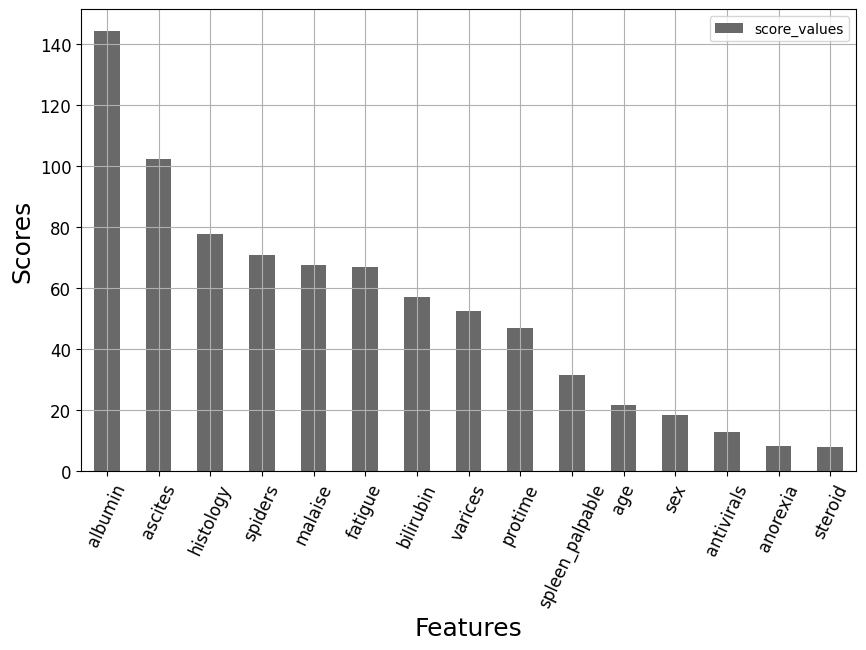

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=12)
plt.xticks(rotation = 65)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X.shape

(246, 19)

In [ ]:
f_classif = X[list(best_15.index)]
f_classif.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(f_classif, y, random_state=42, test_size=0.25)
X_train.shape

(184, 15)

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=39)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=39)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.03511191734215131)
{'var_smoothing': 0.03511191734215131}
LogisticRegression(random_state=0)
SGDClassifier(random_state=5)
ExtraTreesClassifier(random_state=4)


In [ ]:
df_models_acc
# f_classif_SMOTETomek

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.903226
GNB,0.891304,0.903226
SGD,0.782609,0.774194
LR,0.913043,0.935484
SVM,0.940217,0.919355
DT,1.0,0.870968
XT,1.0,0.935484
Stacking,1.0,0.919355


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Selection Using ExtraTrees

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

# resample by adding samples to minority class using SMOTE
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X, y)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

X = X_oversamp
y = Y_over_samp

Class counts after resampling Counter({1.0: 123, 0.0: 123})


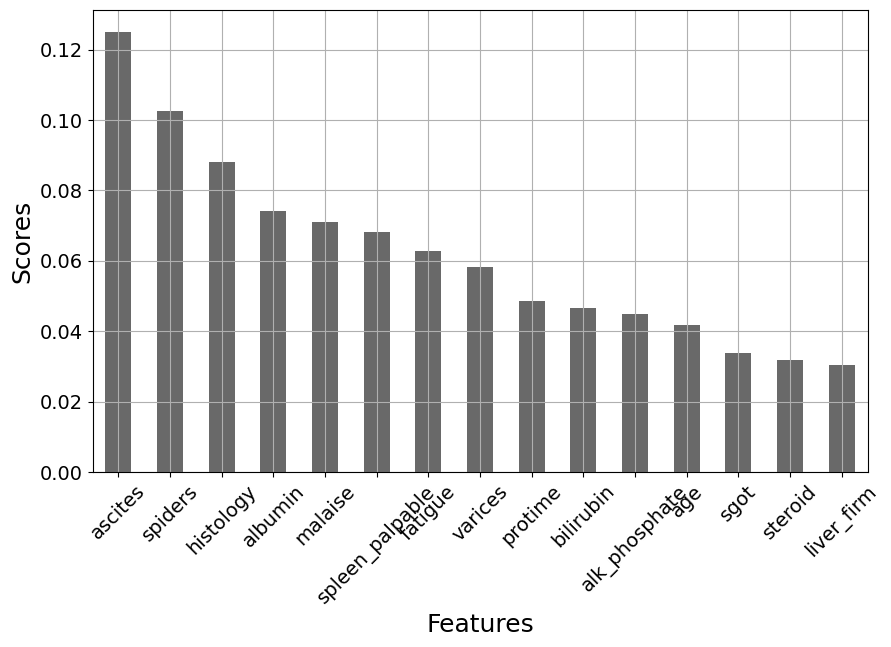

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_Extra_tree = X[list(importances.nlargest(15).index)]
X_Extra_tree.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Extra_tree, y, random_state=42, test_size=0.25)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=3)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=6)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=1.0)
{'var_smoothing': 1.0}
LogisticRegression(random_state=0)
SGDClassifier(random_state=41)
ExtraTreesClassifier(random_state=25)


In [ ]:
df_models_acc
# XT_SMOTETomek

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.951613
GNB,0.869565,0.887097
SGD,0.875,0.854839
LR,0.891304,0.903226
SVM,0.951087,0.919355
DT,1.0,0.83871
XT,1.0,0.935484
Stacking,1.0,0.967742


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using xgboost

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

# resample by adding samples to minority class using SMOTE
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X, y)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

X = X_oversamp
y = Y_over_samp

Class counts after resampling Counter({1.0: 123, 0.0: 123})


[06:02:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


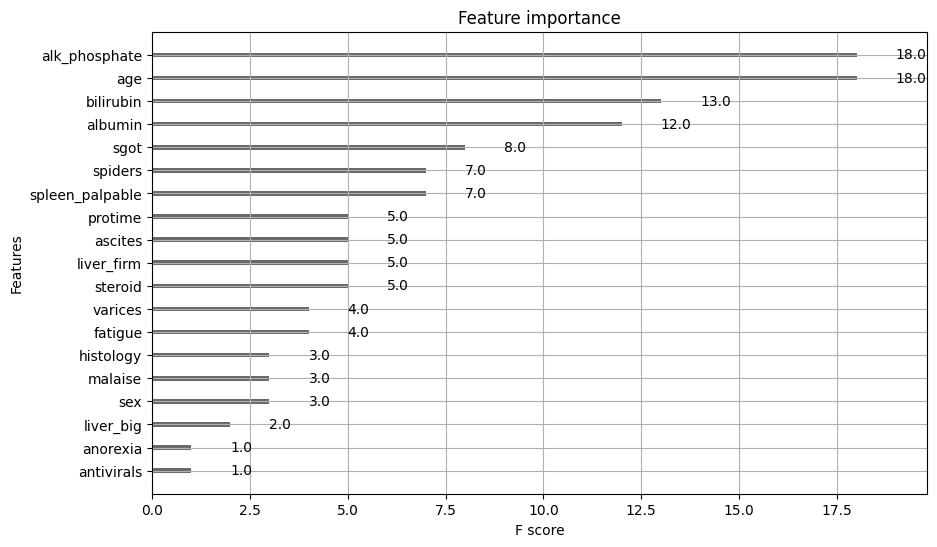

In [ ]:
X = X.astype(float) #Cause some are of object type, code doesn't work in xgb.DMatrix(X, y)
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
X_xgboost = X[['alk_phosphate', 'age', 'bilirubin', 'albumin', 'sgot', 'spiders', 'spleen_palpable', 'protime', 'ascites', 'liver_firm', 'steroid', 'varices', 'fatigue', 'histology', 'malaise']]
X_xgboost.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y, random_state=42, test_size=0.25)

In [ ]:
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=45)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=21)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=1.0)
{'var_smoothing': 1.0}
LogisticRegression(random_state=0)
SGDClassifier(random_state=41)
ExtraTreesClassifier(random_state=20)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

In [ ]:
df_models_acc
# XGB_SMOTETomek

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.951613
GNB,0.869565,0.887097
SGD,0.875,0.854839
LR,0.891304,0.903226
SVM,0.951087,0.919355
DT,1.0,0.854839
XT,1.0,0.951613
Stacking,1.0,0.967742


##Feature Importance Using RF, Based on MDI

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

# resample by adding samples to minority class using SMOTE
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X, y)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

X = X_oversamp
y = Y_over_samp

Class counts after resampling Counter({1.0: 123, 0.0: 123})


Elapsed time to compute the importances: 0.010 seconds


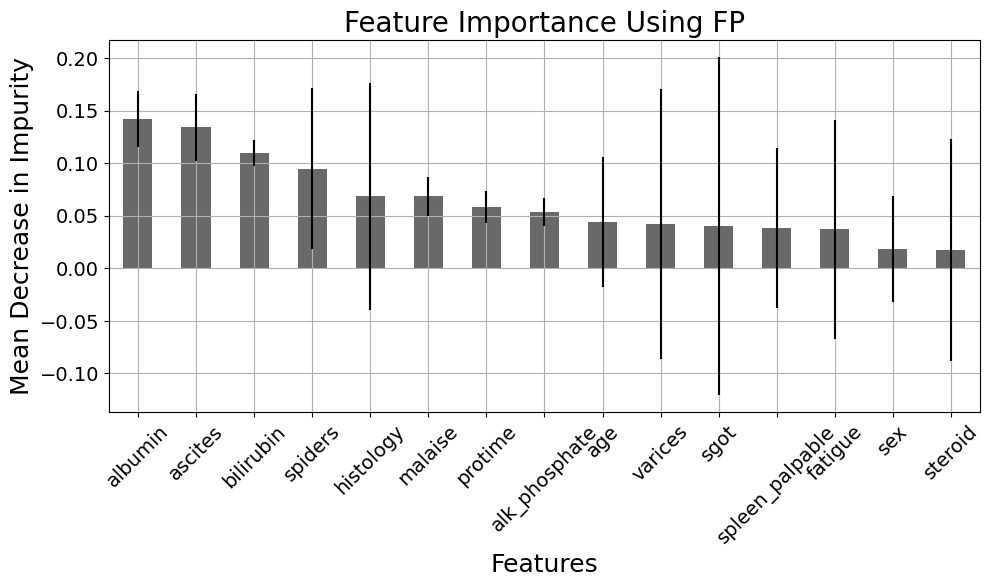

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importance Using FP", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
X_rf_mdi = X[best_15.features.values]
X_rf_mdi.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=2)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=29)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.04328761281083057)
{'var_smoothing': 0.04328761281083057}
LogisticRegression(random_state=0)
SGDClassifier(random_state=47)
ExtraTreesClassifier(random_state=7)


In [ ]:
df_models_acc
# MDI_SMOTETomek

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.919355
GNB,0.891304,0.919355
SGD,0.875,0.83871
LR,0.891304,0.919355
SVM,0.961957,0.919355
DT,1.0,0.870968
XT,1.0,0.951613
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on Feature Permutation

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

# resample by adding samples to minority class using SMOTE
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X, y)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

X = X_oversamp
y = Y_over_samp

Class counts after resampling Counter({1.0: 123, 0.0: 123})


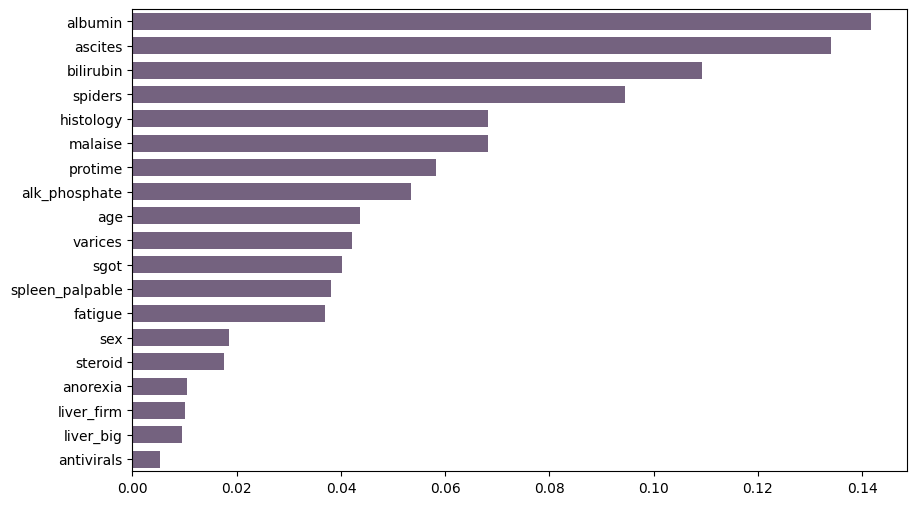

In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X.shape

(246, 19)

In [ ]:
X_rf_permutation = X[['albumin', 'ascites', 'bilirubin', 'spiders', 'histology', 'malaise', 'protime', 'alk_phosphate', 'age', 'varices', 'sgot', 'spleen_palpable', 'fatigue', 'sex', 'steroid']]
X_rf_permutation.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=2)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=29)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.04328761281083057)
{'var_smoothing': 0.04328761281083057}
LogisticRegression(random_state=0)
SGDClassifier(random_state=47)
ExtraTreesClassifier(random_state=7)


In [ ]:
df_models_acc
# FP_SMOTETomek

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.919355
GNB,0.891304,0.919355
SGD,0.875,0.83871
LR,0.891304,0.919355
SVM,0.961957,0.919355
DT,1.0,0.870968
XT,1.0,0.951613
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Data Balancing, SMOTEN

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
print(f"Class counts after resampling {Counter(y_res)}")

X = X_res
y = y_res

Class counts after resampling Counter({1.0: 123, 0.0: 123})


ML Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(184, 19)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=5)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=15)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0533669923120631)
{'var_smoothing': 0.0533669923120631}
LogisticRegression(random_state=0)
SGDClassifier(random_state=26)
ExtraTreesClassifier(random_state=20)


In [ ]:
df_models_acc
# 19_features_SMOTEN

,train_acc,test_acc
RF,1.0,0.951613
KNN,1.0,0.919355
GNB,0.88587,0.935484
SGD,0.880435,0.903226
LR,0.902174,0.903226
SVM,0.956522,0.935484
DT,1.0,0.887097
XT,1.0,0.951613
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))


###Feature Selection, SelectKBest(score_func = f_classif)

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
print(f"Class counts after resampling {Counter(y_res)}")

X = X_res
y = y_res

Class counts after resampling Counter({1.0: 123, 0.0: 123})


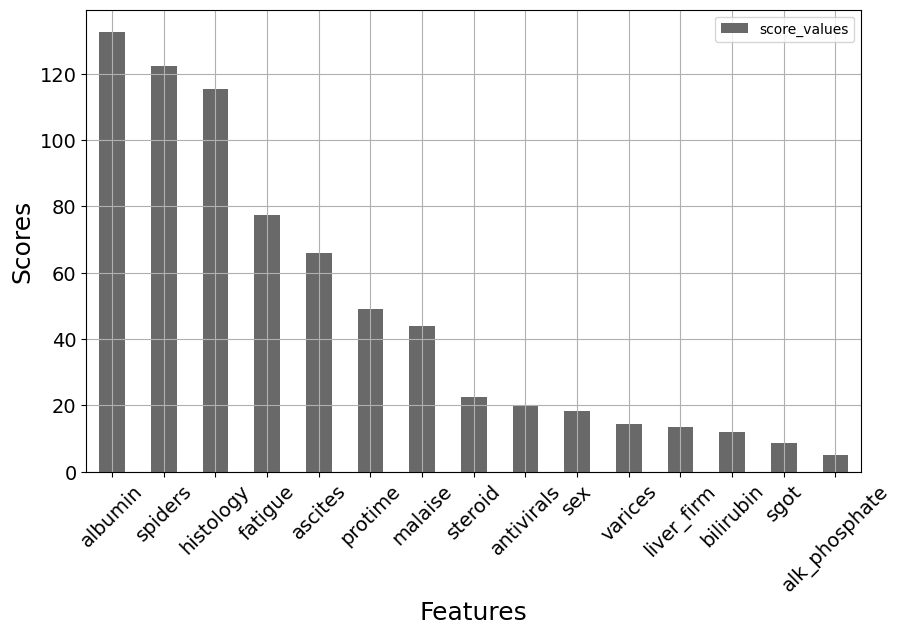

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_f_classif = X[list(best_15.index)]
X_f_classif.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_f_classif, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=4)
KNeighborsClassifier()
DecisionTreeClassifier(random_state=49)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1873817422860384)
{'var_smoothing': 0.1873817422860384}
LogisticRegression(random_state=0)
SGDClassifier(random_state=47)
ExtraTreesClassifier(random_state=5)


In [ ]:
df_models_acc
# f_classif_SMOTEN

,train_acc,test_acc
RF,1.0,0.951613
KNN,0.891304,0.919355
GNB,0.88587,0.935484
SGD,0.907609,0.919355
LR,0.902174,0.919355
SVM,0.934783,0.935484
DT,1.0,0.870968
XT,1.0,0.951613
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Selection Using ExtraTrees

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
print(f"Class counts after resampling {Counter(y_res)}")

X = X_res
y = y_res

Class counts after resampling Counter({1.0: 123, 0.0: 123})


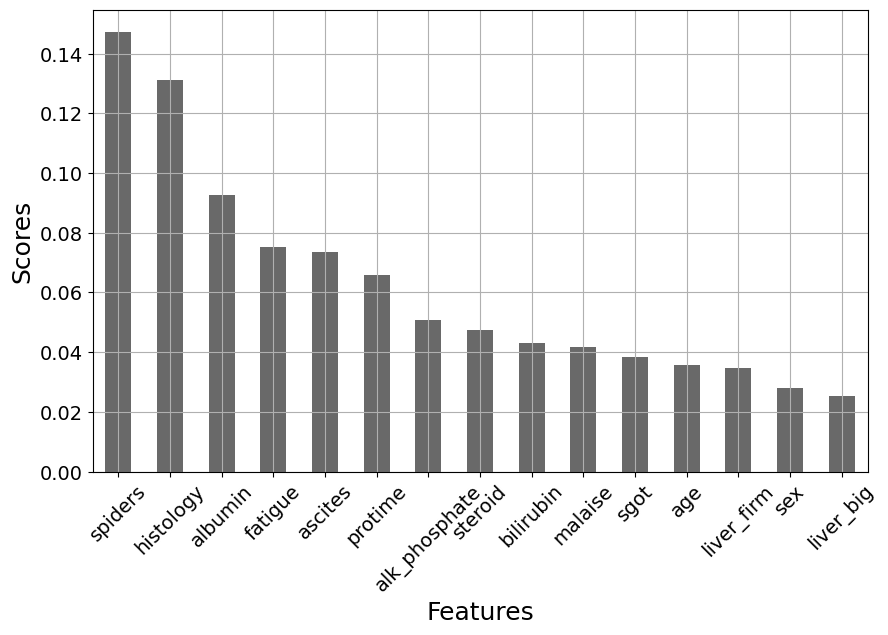

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_Extra_tree = X[list(importances.nlargest(15).index)]
X_Extra_tree.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Extra_tree, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=46)
KNeighborsClassifier()
DecisionTreeClassifier(random_state=15)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.08111308307896872)
{'var_smoothing': 0.08111308307896872}
LogisticRegression(random_state=0)
SGDClassifier(random_state=28)
ExtraTreesClassifier(random_state=29)


In [ ]:
df_models_acc
# XT_SMOTEN

,train_acc,test_acc
RF,1.0,0.951613
KNN,0.902174,0.935484
GNB,0.88587,0.935484
SGD,0.755435,0.758065
LR,0.902174,0.903226
SVM,0.951087,0.935484
DT,1.0,0.854839
XT,1.0,0.935484
Stacking,0.994565,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using xgboost

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
print(f"Class counts after resampling {Counter(y_res)}")

X = X_res
y = y_res

Class counts after resampling Counter({1.0: 123, 0.0: 123})


[10:59:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


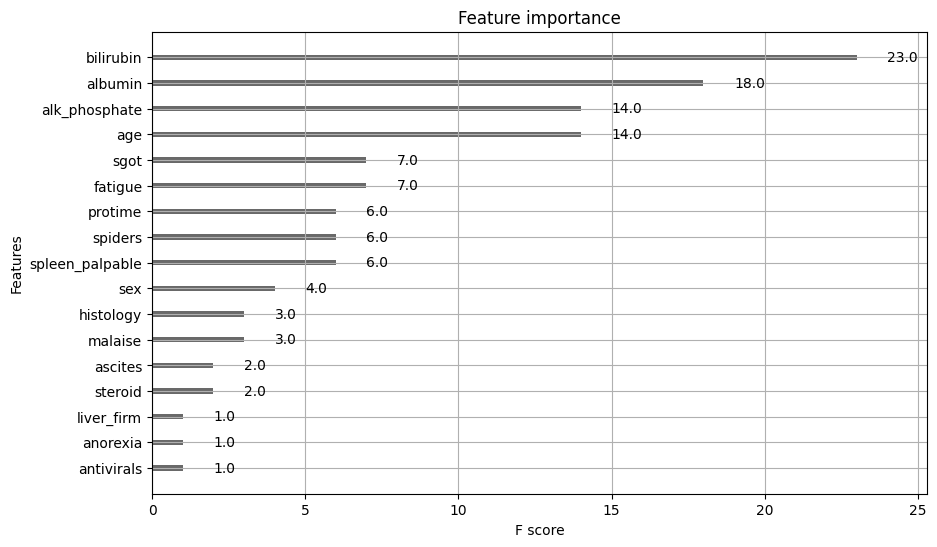

In [ ]:
X = X.astype(float) #Cause some are of object type, code doesn't work mentioned below.

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
X.shape

(246, 19)

In [ ]:
X_xgboost = X[['bilirubin', 'albumin', 'alk_phosphate', 'age', 'sgot', 'fatigue', 'protime', 'spiders', 'spleen_palpable', 'sex', 'histology', 'malaise', 'ascites', 'steroid', 'liver_firm']]
X_xgboost.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:

#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=28)
KNeighborsClassifier()
DecisionTreeClassifier(random_state=47)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.08111308307896872)
{'var_smoothing': 0.08111308307896872}
LogisticRegression(random_state=0)
SGDClassifier(random_state=45)
ExtraTreesClassifier(random_state=47)


In [ ]:
df_models_acc
# XGB_SMOTEN

,train_acc,test_acc
RF,1.0,0.951613
KNN,0.891304,0.887097
GNB,0.88587,0.919355
SGD,0.902174,0.887097
LR,0.896739,0.887097
SVM,0.934783,0.935484
DT,1.0,0.870968
XT,1.0,0.935484
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on MDI

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
print(f"Class counts after resampling {Counter(y_res)}")

X = X_res
y = y_res

Class counts after resampling Counter({1.0: 123, 0.0: 123})


Elapsed time to compute the importances: 0.007 seconds


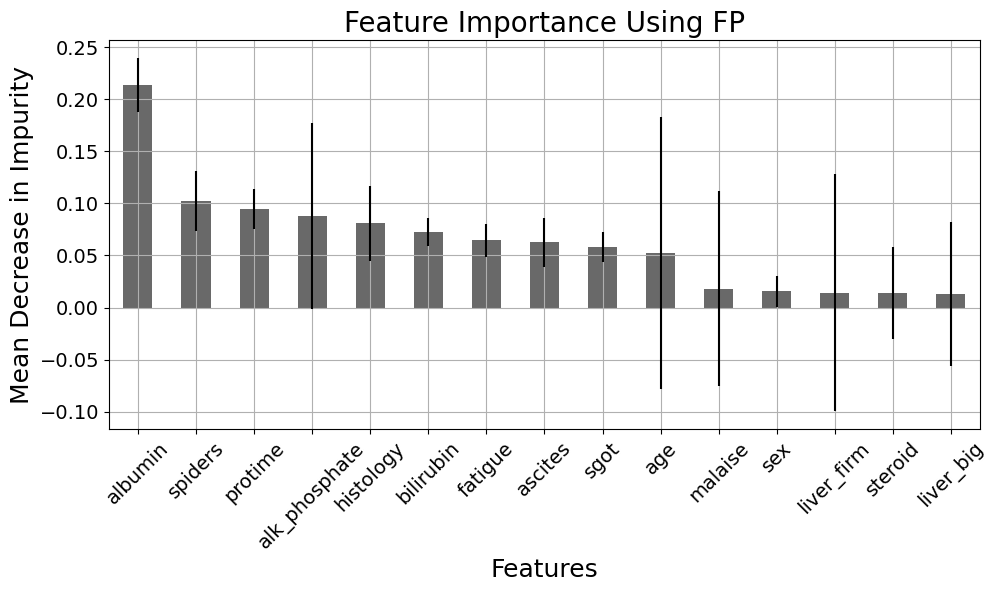

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importance Using FP", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
forest_importances.index

Index(['albumin', 'spiders', 'protime', 'alk_phosphate', 'histology',
       'bilirubin', 'fatigue', 'ascites', 'sgot', 'age', 'malaise', 'sex',
       'liver_firm', 'steroid', 'liver_big'],
      dtype='object')

In [ ]:
X_rf_mdi = X[forest_importances.index]
X_rf_mdi.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=21)
KNeighborsClassifier()
DecisionTreeClassifier(random_state=5)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.08111308307896872)
{'var_smoothing': 0.08111308307896872}
LogisticRegression(random_state=0)
SGDClassifier(random_state=28)
ExtraTreesClassifier(random_state=18)


In [ ]:
df_models_acc
# MDI_SMOTEN

,train_acc,test_acc
RF,1.0,0.935484
KNN,0.902174,0.935484
GNB,0.88587,0.935484
SGD,0.755435,0.758065
LR,0.902174,0.903226
SVM,0.951087,0.935484
DT,1.0,0.870968
XT,1.0,0.935484
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on Feature Permutation

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
print(f"Class counts after resampling {Counter(y_res)}")

X = X_res
y = y_res

Class counts after resampling Counter({1.0: 123, 0.0: 123})


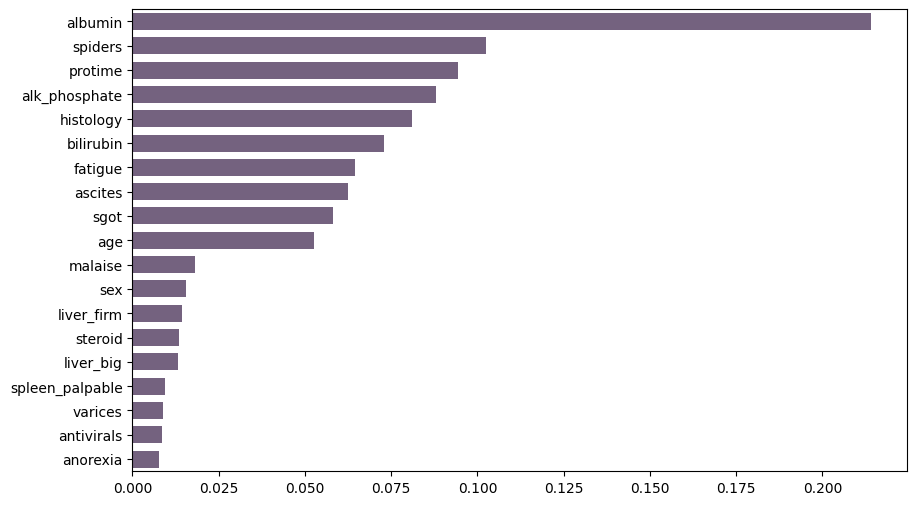

In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X.shape

(246, 19)

In [ ]:
X_rf_permutation = X[['albumin', 'spiders', 'protime', 'alk_phosphate', 'histology',
       'bilirubin', 'fatigue', 'ascites', 'sgot', 'age', 'malaise', 'sex',
       'liver_firm', 'steroid', 'liver_big']]
X_rf_permutation.shape

(246, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=21)
KNeighborsClassifier()
DecisionTreeClassifier(random_state=5)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.08111308307896872)
{'var_smoothing': 0.08111308307896872}
LogisticRegression(random_state=0)
SGDClassifier(random_state=28)
ExtraTreesClassifier(random_state=18)


In [ ]:
df_models_acc
# FP_SMOTEN

,train_acc,test_acc
RF,1.0,0.935484
KNN,0.902174,0.935484
GNB,0.88587,0.935484
SGD,0.755435,0.758065
LR,0.902174,0.903226
SVM,0.951087,0.935484
DT,1.0,0.870968
XT,1.0,0.935484
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Data Balancing, NearMiss

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 32, 1.0: 32})


ML Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(48, 19)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]


df_models_acc

RandomForestClassifier(random_state=17)
KNeighborsClassifier(n_neighbors=2)
DecisionTreeClassifier(random_state=30)
SVC(kernel='sigmoid', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0003511191734215131)
{'var_smoothing': 0.0003511191734215131}
LogisticRegression(random_state=0)
SGDClassifier(random_state=27)
ExtraTreesClassifier(random_state=10)


,train_acc,test_acc
RF,1.0,0.875
KNN,0.875,0.8125
GNB,0.895833,0.75
SGD,0.916667,0.875
LR,0.895833,0.875
SVM,0.833333,0.875
DT,1.0,0.875
XT,1.0,0.8125
Stacking,0.895833,0.875


In [ ]:
df_models_acc
# 19_features_NearMiss

,train_acc,test_acc
RF,1.0,0.875
KNN,0.875,0.8125
GNB,0.895833,0.75
SGD,0.916667,0.875
LR,0.895833,0.875
SVM,0.833333,0.875
DT,1.0,0.875
XT,1.0,0.8125
Stacking,0.895833,0.875


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Selection, SelectKBest(score_func = f_classif)

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 32, 1.0: 32})


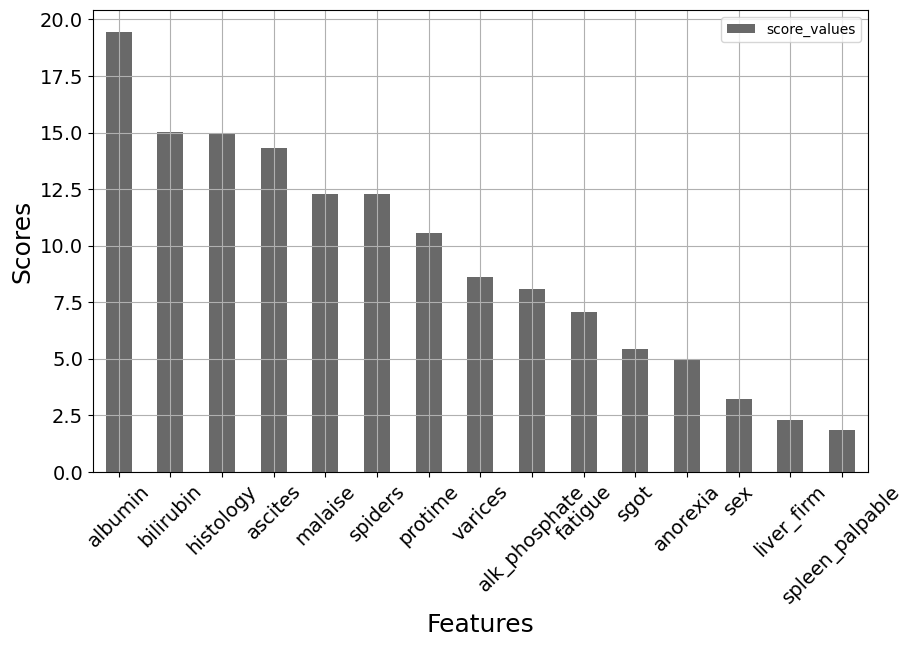

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_f_classif = X[list(best_15.index)]
X_f_classif.shape

(64, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_f_classif, y, test_size=0.25, random_state=42)
X_train.shape

(48, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=11)
KNeighborsClassifier(n_neighbors=10)
DecisionTreeClassifier(random_state=40)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.008111308307896872)
{'var_smoothing': 0.008111308307896872}
LogisticRegression(random_state=0)
SGDClassifier(random_state=41)
ExtraTreesClassifier(random_state=11)


In [ ]:
df_models_acc
# f_classif_NearMiss

,train_acc,test_acc
RF,1.0,0.875
KNN,0.854167,0.875
GNB,0.875,0.75
SGD,0.916667,0.8125
LR,0.895833,0.9375
SVM,0.895833,0.875
DT,1.0,0.875
XT,1.0,0.75
Stacking,0.895833,0.8125


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Selection Using ExtraTrees

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 32, 1.0: 32})


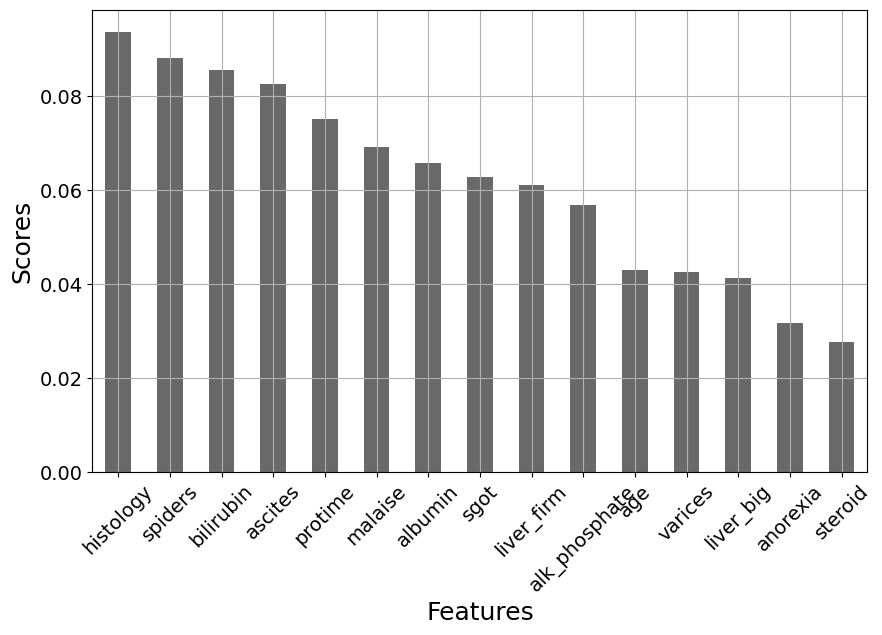

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_Extra_tree = X[list(importances.nlargest(15).index)]
X_Extra_tree.shape

(64, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Extra_tree, y, test_size=0.25, random_state=42)
X_train.shape

(48, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=4)
KNeighborsClassifier(n_neighbors=2)
DecisionTreeClassifier(random_state=20)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0003511191734215131)
{'var_smoothing': 0.0003511191734215131}
LogisticRegression(random_state=0)
SGDClassifier(random_state=8)
ExtraTreesClassifier(random_state=1)


In [ ]:
df_models_acc
# XT_NearMiss

,train_acc,test_acc
RF,1.0,0.875
KNN,0.895833,0.8125
GNB,0.875,0.75
SGD,0.875,0.875
LR,0.895833,0.875
SVM,0.895833,0.875
DT,1.0,0.875
XT,1.0,0.8125
Stacking,0.9375,0.8125


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using xgboost

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 32, 1.0: 32})


[11:26:23] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


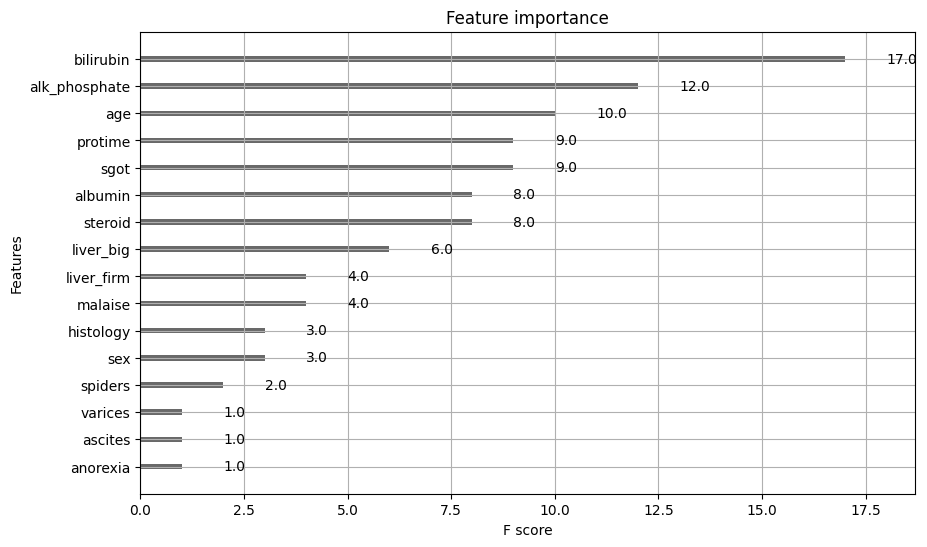

In [ ]:
X = X.astype(float) #Cause some are of object type, code doesn't work mentioned below.
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
X_xgboost = X[['bilirubin', 'alk_phosphate', 'age', 'protime', 'sgot', 'albumin', 'steroid', 'liver_big', 'liver_firm', 'malaise', 'histology', 'sex', 'spiders', 'varices', 'ascites']]
X_xgboost.shape

(64, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y, test_size=0.25, random_state=42)
X_train.shape

(48, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=17)
KNeighborsClassifier(n_neighbors=4)
DecisionTreeClassifier(random_state=1)
SVC(kernel='linear', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=2.848035868435799e-06)
{'var_smoothing': 2.848035868435799e-06}
LogisticRegression(random_state=0)
SGDClassifier(random_state=20)
ExtraTreesClassifier(random_state=26)


In [ ]:
df_models_acc
# XGB_NearMiss

,train_acc,test_acc
RF,1.0,0.875
KNN,0.875,0.8125
GNB,0.875,0.8125
SGD,0.979167,0.8125
LR,0.895833,0.875
SVM,0.875,0.875
DT,1.0,0.875
XT,1.0,0.8125
Stacking,0.958333,0.8125


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on MDI

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 32, 1.0: 32})


Elapsed time to compute the importances: 0.018 seconds


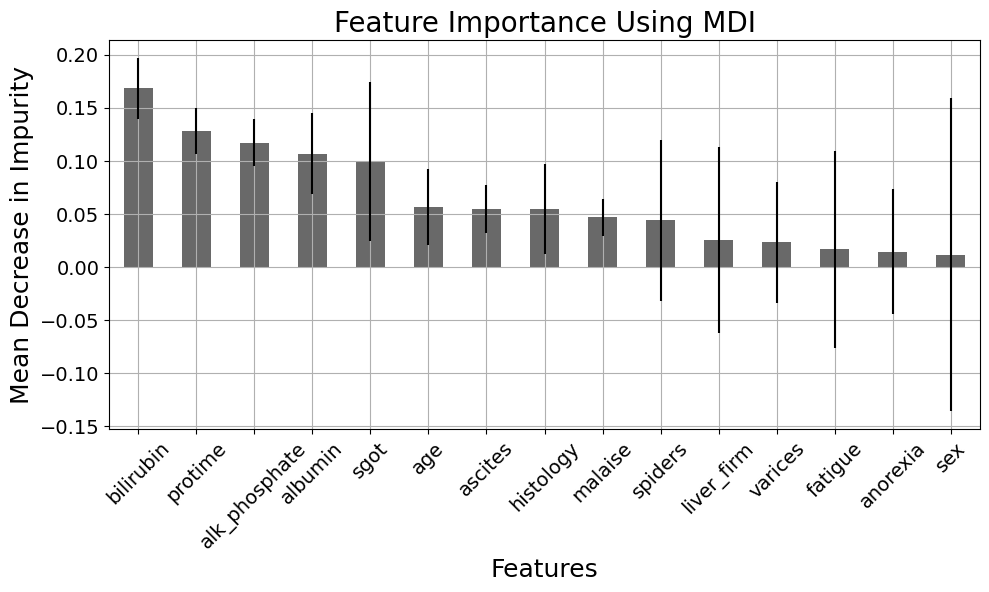

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importance Using MDI", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
X_rf_mdi = X[feature_names]
X_rf_mdi.shape

(64, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.25, random_state=42)
X_train.shape

(48, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=3)
KNeighborsClassifier(n_neighbors=2)
DecisionTreeClassifier(random_state=0)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0023101297000831605)
{'var_smoothing': 0.0023101297000831605}
LogisticRegression(random_state=0)
SGDClassifier(random_state=40)
ExtraTreesClassifier(random_state=1)


In [ ]:
df_models_acc
# MDI_NearMiss

,train_acc,test_acc
RF,1.0,0.8125
KNN,0.875,0.8125
GNB,0.895833,0.75
SGD,0.916667,0.875
LR,0.895833,0.9375
SVM,0.895833,0.9375
DT,1.0,0.875
XT,1.0,0.8125
Stacking,0.916667,0.875


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on Feature Permutation

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 32, 1.0: 32})


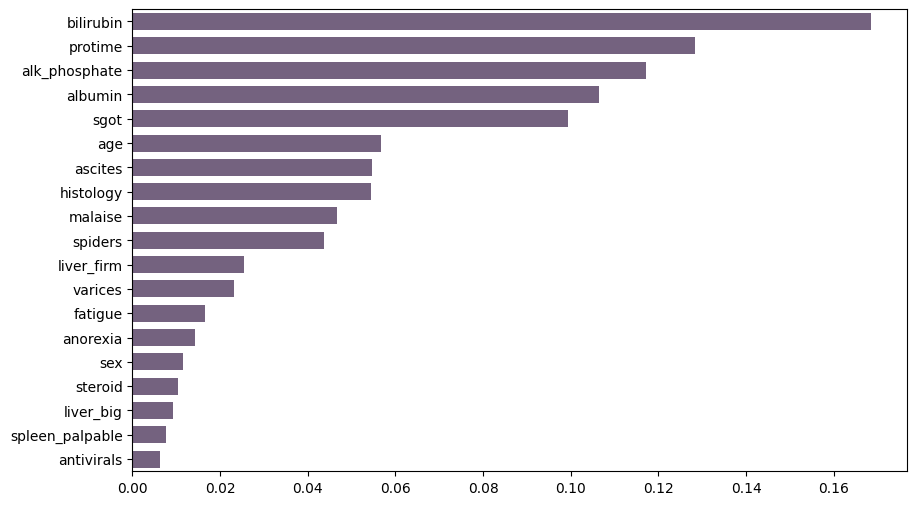

In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X_rf_permutation = X[['bilirubin', 'protime', 'alk_phosphate', 'albumin', 'sgot', 'age', 'ascites', 'histology', 'malaise', 'spiders', 'liver_firm', 'varices', 'fatigue', 'anorexia', 'sex']]
X_rf_permutation.shape

(64, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.25, random_state=42)
X_train.shape

(48, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=3)
KNeighborsClassifier(n_neighbors=2)
DecisionTreeClassifier(random_state=0)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0023101297000831605)
{'var_smoothing': 0.0023101297000831605}
LogisticRegression(random_state=0)
SGDClassifier(random_state=40)
ExtraTreesClassifier(random_state=1)


In [ ]:
df_models_acc
# FP_NearMiss

,train_acc,test_acc
RF,1.0,0.8125
KNN,0.875,0.8125
GNB,0.895833,0.75
SGD,0.916667,0.875
LR,0.895833,0.9375
SVM,0.895833,0.9375
DT,1.0,0.875
XT,1.0,0.8125
Stacking,0.916667,0.875


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Data Balancing, SMOTE

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 123, 0.0: 123})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(184, 19)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=7)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=9)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.02848035868435802)
{'var_smoothing': 0.02848035868435802}
LogisticRegression(random_state=0)
SGDClassifier(random_state=7)
ExtraTreesClassifier(random_state=1)


In [ ]:
df_models_acc
# 19_features_SMOTE

,train_acc,test_acc
RF,1.0,0.951613
KNN,1.0,0.903226
GNB,0.875,0.887097
SGD,0.853261,0.887097
LR,0.907609,0.951613
SVM,0.956522,0.935484
DT,1.0,0.83871
XT,1.0,0.951613
Stacking,1.0,0.935484


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Selection, SelectKBest(score_func = f_classif)

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 123, 0.0: 123})


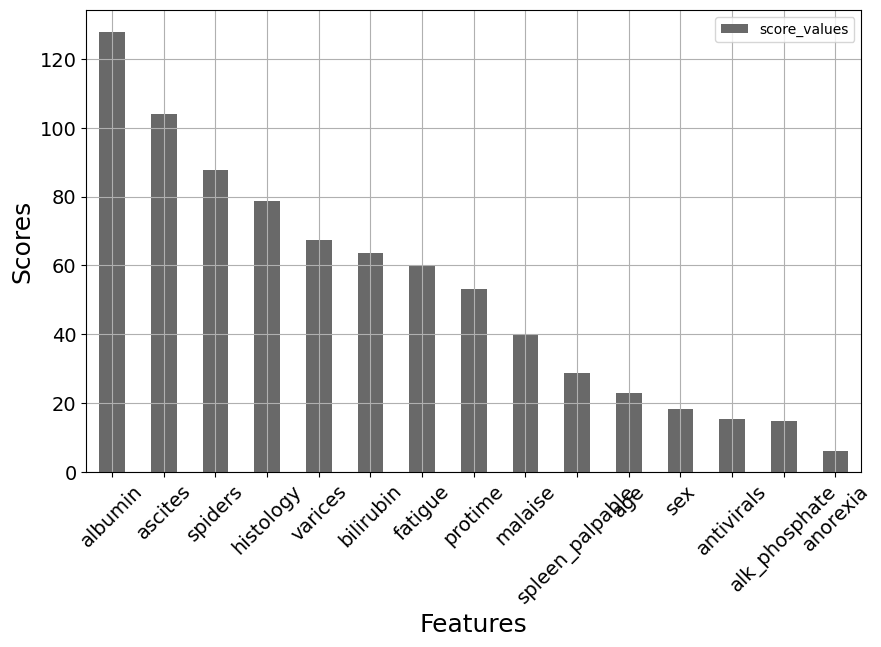

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X = X[best_15.index]
X.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=41)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=9)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.005336699231206307)
{'var_smoothing': 0.005336699231206307}
LogisticRegression(random_state=0)
SGDClassifier(random_state=41)
ExtraTreesClassifier(random_state=21)


In [ ]:
df_models_acc
# f_classif_SMOTE

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.903226
GNB,0.875,0.887097
SGD,0.880435,0.854839
LR,0.896739,0.903226
SVM,0.951087,0.919355
DT,1.0,0.854839
XT,1.0,0.935484
Stacking,1.0,0.935484


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Selection Using ExtraTrees

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 123, 0.0: 123})


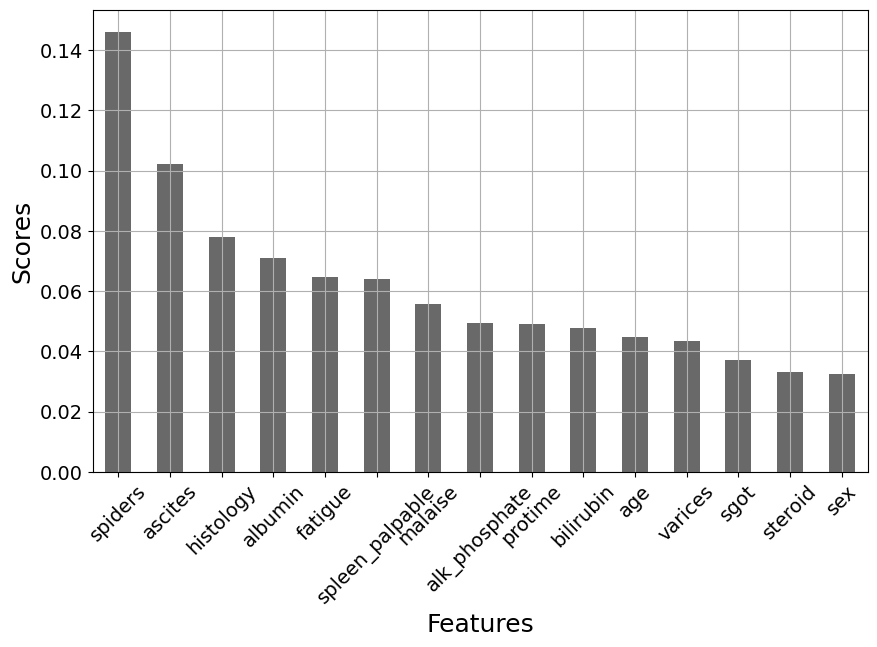

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_tree = X[importances.nlargest(15).index]
X_tree.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=23)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=25)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.04328761281083057)
{'var_smoothing': 0.04328761281083057}
LogisticRegression(random_state=0)
SGDClassifier(random_state=26)
ExtraTreesClassifier(random_state=5)


In [ ]:
df_models_acc
# XT_SMOTE

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.935484
GNB,0.869565,0.951613
SGD,0.766304,0.725806
LR,0.880435,0.935484
SVM,0.945652,0.951613
DT,1.0,0.854839
XT,1.0,0.951613
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Importance Using xgboost

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 123, 0.0: 123})


[12:02:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


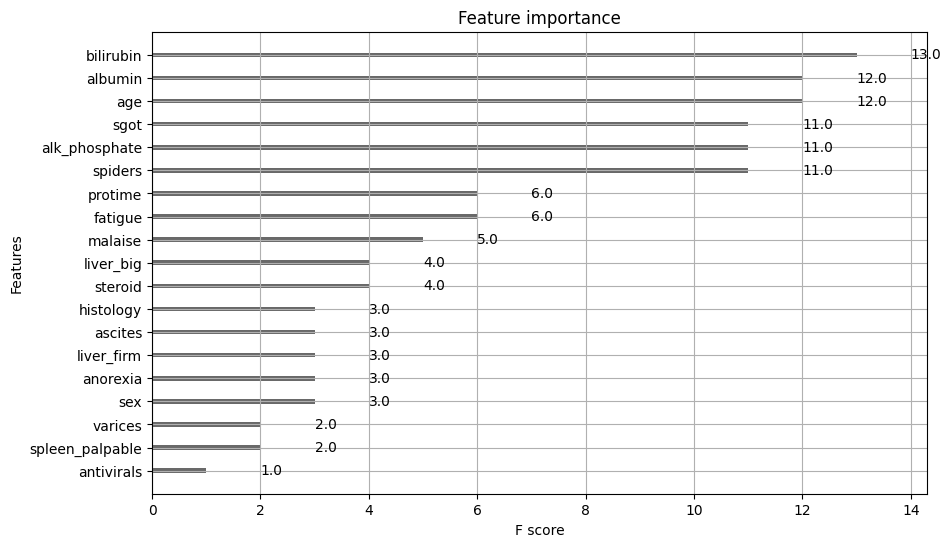

In [ ]:
X = X.astype(float) #Cause some are of object type, code doesn't work mentioned below.
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
xgboost = X[['bilirubin', 'albumin', 'age', 'sgot', 'alk_phosphate', 'spiders', 'protime', 'fatigue', 'malaise', 'liver_big', 'steroid', 'histology', 'ascites', 'liver_firm', 'anorexia']]
xgboost.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xgboost, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=18)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=21)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.8111308307896871)
{'var_smoothing': 0.8111308307896871}
LogisticRegression(random_state=0)
SGDClassifier(random_state=34)
ExtraTreesClassifier(random_state=4)


In [ ]:
df_models_acc
# XGB_SMOTE

,train_acc,test_acc
RF,1.0,0.951613
KNN,1.0,0.903226
GNB,0.858696,0.870968
SGD,0.798913,0.822581
LR,0.869565,0.854839
SVM,0.972826,0.935484
DT,1.0,0.870968
XT,1.0,0.967742
Stacking,1.0,0.935484


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Importance Using RF, Based on MDI

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 123, 0.0: 123})


Elapsed time to compute the importances: 0.012 seconds


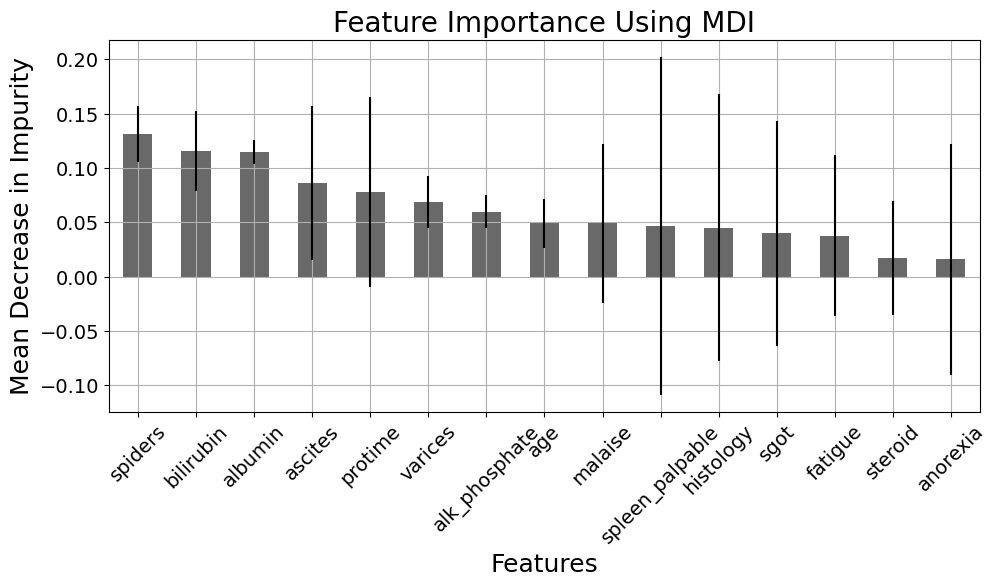

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importance Using MDI", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
X.shape

(246, 19)

In [ ]:
X_rf_mdi = X[forest_importances.index]
X_rf_mdi.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=44)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=1)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1873817422860384)
{'var_smoothing': 0.1873817422860384}
LogisticRegression(random_state=0)
SGDClassifier(random_state=34)
ExtraTreesClassifier(random_state=11)


In [ ]:
df_models_acc
# MDI_SMOTE

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.903226
GNB,0.86413,0.854839
SGD,0.880435,0.903226
LR,0.891304,0.83871
SVM,0.934783,0.774194
DT,1.0,0.903226
XT,1.0,0.935484
Stacking,1.0,0.935484


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Importance Using RF, Based on FP

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 123, 0.0: 123})


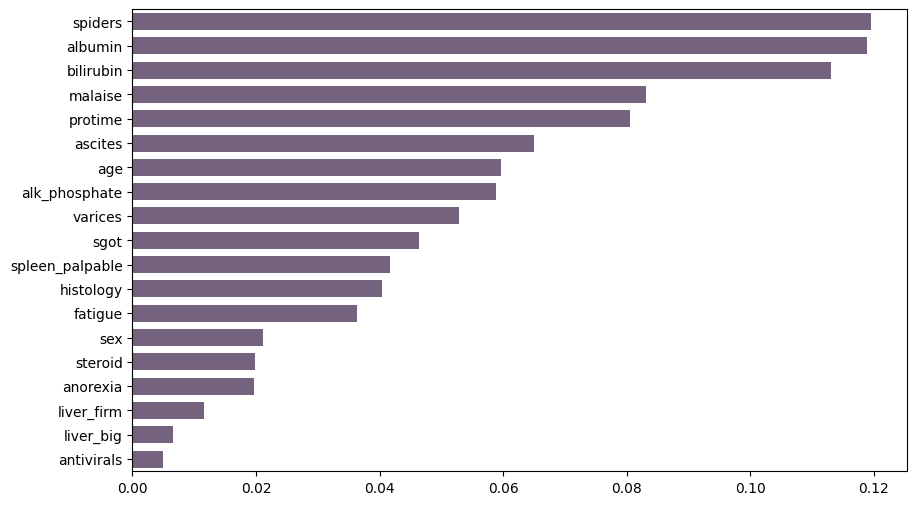

In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X_rf_permutation = X[['spiders', 'albumin', 'bilirubin', 'malaise', 'protime', 'ascites', 'age', 'alk_phosphate', 'varices', 'sgot', 'spleen_palpable', 'histology', 'fatigue', 'sex', 'steroid']]
X_rf_permutation.shape

(246, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.25, random_state=42)
X_train.shape

(184, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, test_acc]

RandomForestClassifier(random_state=20)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=9)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0005336699231206307)
{'var_smoothing': 0.0005336699231206307}
LogisticRegression(random_state=0)
SGDClassifier(random_state=38)
ExtraTreesClassifier(random_state=38)


In [ ]:
df_models_acc
# FP_SMOTE

,train_acc,test_acc
RF,1.0,0.935484
KNN,1.0,0.919355
GNB,0.88587,0.903226
SGD,0.880435,0.854839
LR,0.896739,0.903226
SVM,0.940217,0.935484
DT,1.0,0.806452
XT,1.0,0.951613
Stacking,1.0,0.951613


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))